In [ ]:
! pip install deepface
from deepface import DeepFace

     |████████████████████████████████| 61 kB 2.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.3 MB 39.6 MB/s 
  Created wheel for gdown: filename=gdown-4.2.0-py3-none-any.whl size=14273 sha256=b1e041214ea8a3aae9bb6158137e3663761b80572d48d3131d821dc802356bac
  Stored in directory: /root/.cache/pip/wheels/8c/17/ff/58721d1fabdb87c21a0529948cf39e2be9af90ddbe4ad65944
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4
Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [ ]:
import numpy as np
from os import listdir
from google.colab import drive
from matplotlib import pyplot as plt

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
def FaceRecognizer(filename1,filename2):
  folder = './gdrive/MyDrive/Final_Test/'
  # path
  filenameTest = folder + filename1
  filenameVerify= folder + filename2
  if filename2.find("j2k_r") == -1 and filename2.find("j2k") == -1:
    TypeOfTest='normal'
  else:
    if(filename2.find("j2k_r") == -1):
          TypeOfTest='hardEncrypted'
    else:
          TypeOfTest='lowEncrypted'

  detected=DeepFace.verify(img1_path=filenameTest,img2_path=filenameVerify,model_name='Facenet',enforce_detection=False)
  if(filename1.split('_')[0] ==  filename2.split('_')[0]):
    if(detected['verified']):
          return (TypeOfTest,1,detected['distance'],'same')
    else:
          return (TypeOfTest,-1,0,'same')
  else:
    if(detected['verified']):
          return (TypeOfTest,-1,0,'different')
    else:
          return (TypeOfTest,1,detected['distance'],'different')



In [ ]:
# demonstrate face detection on 5 Celebrity Faces Dataset
# specify folder to plot
filename1_normal='501194_490544.jpg'
filename2_normal='501195_490571.jpg'
array_test_images=[filename1_normal,filename2_normal]
folder = './gdrive/MyDrive/Final_Test/'
i = 1
x_axis=0
normal_y_axis=0
lowEncrypted_y_axis=0
distances_normal=0
distances_normal_different=0
distances_lowEncrypted=0
distances_lowEncrypted_different=0
highEncrypted_y_axis=0
distances_highEncrypted=0
distances_highEncrypted_different=0
for testFile in array_test_images:
    # enumerate files
  for filename in listdir(folder):
    # get prediction
    if(filename != '.ipynb_checkpoints'):
      [TypeOfTest,value,distance,sameOrDiff] = FaceRecognizer(testFile,filename)
      i+=1
      if(TypeOfTest=='normal'):
        if(sameOrDiff=='same'):
                  normal_y_axis+=value
                  distances_normal+=distance
        else:
                  normal_y_axis+=value
                  distances_normal_different+=distance
      elif(TypeOfTest == 'lowEncrypted'):
        if(sameOrDiff == 'same'):
          lowEncrypted_y_axis+=value
          distances_lowEncrypted+=distance
        else:
          lowEncrypted_y_axis+=value
          distances_lowEncrypted_different+=distance
      else:
        if(sameOrDiff == 'same'):
           highEncrypted_y_axis+=value
           distances_highEncrypted+=distance
        else:
           highEncrypted_y_axis+=value
           distances_highEncrypted_different+=distance

facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:01<00:00, 64.2MB/s]


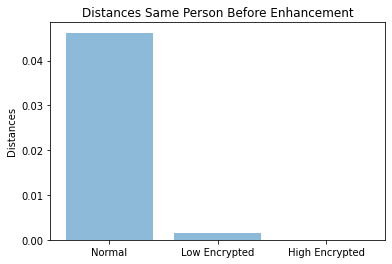

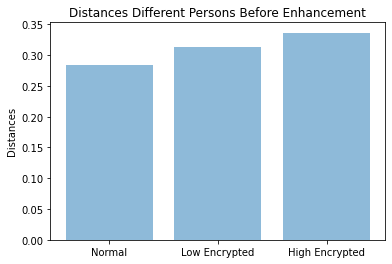

In [ ]:
plt.figure(1)
objects = ('Normal', 'Low Encrypted','High Encrypted')
y_pos = np.arange(len(objects))
performance = [distances_normal/240,distances_lowEncrypted/240,distances_highEncrypted/240]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Distances')
plt.title('Distances Same Person Before Enhancement')
plt.figure(2)
performance_different_persons = [distances_normal_different/240,distances_lowEncrypted_different/240,distances_highEncrypted_different/240]
plt.bar(y_pos, performance_different_persons, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Distances')
plt.title('Distances Different Persons Before Enhancement')
plt.show()

# Enhancement Part & Loading Models

In [ ]:
import tensorflow as tf
import os
import pathlib
import time
import datetime
from matplotlib import pyplot as plt
from IPython import display
import PIL
import numpy as np
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from PIL import Image

In [ ]:
def load_base_images(path):
    base_images_list=list()
    names_base=list()
    for subdir, dirs, files in os.walk(path):
                        dirs.sort()
                        os.chdir(subdir)
                        for file in files:
                            if "j2k" not in file: 
                              names_base.append(file.split('.')[0])
                            # load and resize the image
                              image = load_img(subdir+'/'+file,target_size=(256,256))
                              image_array = img_to_array(image)
                              base_images_list.append(image_array)
                        return base_images_list ,names_base

In [ ]:
def load_encrypted_image(path,names_base):
    counter=0
    encrypted_images_list=list()
    for subdir, dirs, files in os.walk(path):
                        dirs.sort()
                        os.chdir(subdir)
                        for file in files:
                            if "j2k_r-W4-O6" in file: 
                            # load and resize the image
                              image = load_img(subdir+'/'+names_base[counter]+'_j2k_r-W4-O6.png',target_size=(256,256))
                              image_array = img_to_array(image)
                              encrypted_images_list.append(image_array)
                              counter+=1
                        return encrypted_images_list

In [ ]:
 #load real dataset
real_data_array , names_base=load_base_images('/content/gdrive/MyDrive/Final_Test/')
real_data_array=[np.asarray((real_data_array), dtype=np.float)]
# load Encrypted-L dataset
encrypted_data_array=[np.asarray(load_encrypted_image('/content/gdrive/MyDrive/Final_Test/',names_base), dtype=np.float)]
print(np.asarray(real_data_array).shape)
print(np.asarray(encrypted_data_array).shape)
# !-------------------- !! ----------------------------------- #
x=0
merged_images=[]
for img in real_data_array[0]:
  #Read the two images
  image1 = Image.fromarray(np.uint8(real_data_array[0][x])).convert('RGB')
  image2 = Image.fromarray(np.uint8(encrypted_data_array[0][x])).convert('RGB')
  #resize, first image
  image1_size = image1.size
  image2_size = image2.size
  new_image = Image.new('RGB',(2*image1_size[0], image1_size[1]), (250,250,250))
  new_image.paste(image1,(0,0))
  new_image.paste(image2,(image1_size[0],0))
  img_saved=np.array(new_image)
  x=x+1
  merged_images.append(img_saved)
print(np.asarray(merged_images).shape)
# !-------------------- !! ----------------------------------- #
def load(image_file):
    w = tf.shape(image_file)[1]  
    w = w // 2
    input_image = image_file[:, w:, :]
    real_image = image_file[:, :w, :]
    # Convert both images to float32 tensors
    input_image = tf.cast(input_image, tf.float32)
    real_image = tf.cast(real_image, tf.float32)
    return input_image, real_image
# The facade training set
BUFFER_SIZE = 80
IMG_WIDTH = 256
IMG_HEIGHT = 256
def resize(input_image, real_image, height, width):
  input_image = tf.image.resize(input_image, [height, width],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  real_image = tf.image.resize(real_image, [height, width],
                              method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  return input_image, real_image
def random_crop(input_image, real_image):

    print(IMG_HEIGHT)
    stacked_image = tf.stack([input_image, real_image], axis=0)
    cropped_image = tf.image.random_crop(stacked_image, size=[2, IMG_HEIGHT, IMG_WIDTH, 3])
    return cropped_image[0], cropped_image[1]
# !-------------------- !! ----------------------------------- #
# Normalizing the images to [-1, 1]
def normalize(input_image, real_image):
  input_image = (input_image / 127.5) - 1
  real_image = (real_image / 127.5) - 1
  return input_image, real_image
@tf.function()
def random_jitter(input_image, real_image):
  # Resizing to 142x142
  input_image, real_image = resize(input_image, real_image,  286, 286)
  # Random cropping back to 112x112
  input_image, real_image = random_crop(input_image, real_image)
  if tf.random.uniform(()) > 0.5:
    # Random mirroring
    input_image = tf.image.flip_left_right(input_image)
    real_image = tf.image.flip_left_right(real_image)
  return input_image, real_image
[inp , re] = load(merged_images[0]) 
BATCH_SIZE = 1
def load_image_train(image_file):
  input_image, real_image = load(image_file)
  input_image, real_image = random_jitter(input_image, real_image)
  input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image
train_dataset = tf.data.Dataset.from_tensor_slices(merged_images)
train_dataset = train_dataset.map(load_image_train,
                                  num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)
def load_image_test(image_file):
  input_image, real_image = load(image_file)
  input_image, real_image = resize(input_image, real_image,IMG_HEIGHT, IMG_WIDTH)
  input_image, real_image = normalize(input_image, real_image)
  return input_image, real_image
test_dataset = tf.data.Dataset.from_tensor_slices(merged_images)
# !-------------------- !! ----------------------------------- #
OUTPUT_CHANNELS = 3
def downsample(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02)
  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                            kernel_initializer=initializer, use_bias=False))
  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())
  result.add(tf.keras.layers.LeakyReLU())
  return result
down_model = downsample(3, 4)
down_result = down_model(tf.expand_dims(inp, 0))
print (down_result.shape,'shape')
def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)
  result = tf.keras.Sequential()
  result.add(
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))
  result.add(tf.keras.layers.BatchNormalization())
  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.5))
  result.add(tf.keras.layers.ReLU())
  return result
up_model = upsample(3, 4)
up_result = up_model(down_result)
print (up_result.shape,'shape up')
def Generator():
    inputs = tf.keras.layers.Input(shape=[256, 256, 3])
    down_stack = [
      downsample(64, 4, apply_batchnorm=False),  # (batch_size, 128, 128, 64)
      downsample(128, 4),  # (batch_size, 64, 64, 128)
      downsample(256, 4),  # (batch_size, 32, 32, 256)
      downsample(512, 4),  # (batch_size, 16, 16, 512)
      downsample(512, 4),  # (batch_size, 8, 8, 512)
      downsample(512, 4),  # (batch_size, 4, 4, 512)
      downsample(512, 4),  # (batch_size, 2, 2, 512)
      downsample(512, 4),  # (batch_size, 1, 1, 512)
    ]
    up_stack = [
      upsample(512, 4, apply_dropout=True),  # (batch_size, 2, 2, 1024)
      upsample(512, 4, apply_dropout=True),  # (batch_size, 4, 4, 1024)
      upsample(512, 4, apply_dropout=True),  # (batch_size, 8, 8, 1024)
      upsample(512, 4),  # (batch_size, 16, 16, 1024)
      upsample(256, 4),  # (batch_size, 32, 32, 512)
      upsample(128, 4),  # (batch_size, 64, 64, 256)
      upsample(64, 4),  # (batch_size, 128, 128, 128)
    ]

    initializer = tf.random_normal_initializer(0., 0.02)
    last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                          strides=2,
                                          padding='same',
                                          kernel_initializer=initializer,
                                          activation='tanh')  # (batch_size, 256, 256, 3)

    x = inputs

    # Downsampling through the model
    skips = []
    for down in down_stack:
      x = down(x)
      skips.append(x)

    skips = reversed(skips[:-1])

    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
      x = up(x)
      x = tf.keras.layers.Concatenate()([x, skip])
    x = last(x)
    return tf.keras.Model(inputs=inputs, outputs=x)
LAMBDA = 100
# ~ -------------------- ~~  -------------------------#
generator = Generator()
gen_output = generator(inp[tf.newaxis, ...], training=False)
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)
def generator_loss(disc_generated_output, gen_output, target):
  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

  # Mean absolute error
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

  total_gen_loss = gan_loss + (LAMBDA * l1_loss)

  return total_gen_loss, gan_loss, l1_loss
def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)

  inp = tf.keras.layers.Input(shape=[256, 256, 3], name='input_image')
  tar = tf.keras.layers.Input(shape=[256, 256, 3], name='target_image')

  x = tf.keras.layers.concatenate([inp, tar])  # (batch_size, 256, 256, channels*2)

  down1 = downsample(64, 4, False)(x)  # (batch_size, 128, 128, 64)
  down2 = downsample(128, 4)(down1)  # (batch_size, 64, 64, 128)
  down3 = downsample(256, 4)(down2)  # (batch_size, 32, 32, 256)

  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)  # (batch_size, 34, 34, 256)
  conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1)  # (batch_size, 31, 31, 512)

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

  zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)  # (batch_size, 33, 33, 512)

  last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2)  # (batch_size, 30, 30, 1)

  return tf.keras.Model(inputs=[inp, tar], outputs=last)
discriminator = Discriminator()
disc_out = discriminator([inp[tf.newaxis, ...], gen_output], training=False)
plt.imshow(disc_out[0, ..., -1], vmin=-20, vmax=20, cmap='RdBu_r')
plt.colorbar()
def discriminator_loss(disc_real_output, disc_generated_output):
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
checkpoint_dir = '/content/gdrive/MyDrive/Biometric/training_checkpoints_r'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                discriminator_optimizer=discriminator_optimizer,
                                generator=generator,
                                discriminator=discriminator)
def generate_images(model, test_input, tar,number):
    prediction = model(test_input, training=True)
    plt.figure(figsize=(15, 15))
    display_list = [test_input[0], tar[0], prediction[0]]
    title = ['Input Image', 'Ground Truth', 'Predicted Image']
    print(type(prediction[0]))
    # g = tf.Graph()
    # IM_HEIGHT  = 112
    # IM_WIDTH = 112  
    # with g.as_default():
    #   inp = tf.Variable(prediction[0])
    #   reshape1 = tf.reshape(prediction[0], [IM_WIDTH, IM_HEIGHT, -1])
    #   sliced = tf.slice(reshape1, [0,0,0], [ IM_WIDTH, IM_HEIGHT,1])
    #   reshaped = tf.reshape(sliced, [IM_HEIGHT, IM_WIDTH, 1])
    #   encoded = tf.image.encode_png(tf.image.convert_image_dtype(reshaped,tf.uint16))
    #   outputfile = tf.write_file('/content/gdrive/MyDrive/Final_test_enhanced/'+str(number)+'_j2k_r-W4-O6.png', encoded)
    #   with tf.Session() as sess:
    #     sess.run(tf.global_variables_initializer())
    #     sess.run(outputfile)
    # image = Image.fromarray(np.asarray(prediction[0]))
    # new_width  = 112
    # new_height = 112
    # image = image.resize((new_width, new_height), Image.ANTIALIAS)
    # image_path='/content/gdrive/MyDrive/Final_test_enhanced/'+str(number)+'_j2k_r-W4-O6.png'
    # image.save(image_path, format='PNG')
    plt.imshow(prediction[0] * 0.5 + 0.5)
    plt.axis('off')
    # plt.savefig('/content/gdrive/MyDrive/Final_test_enhanced/'+str(number)+'_j2k_r-W4-O6.png')
    for i in range(3):
      plt.subplot(1, 3, i+1)
      plt.title(title[i])
      # Getting the pixel values in the [0, 1] range to plot.
      plt.imshow(display_list[i] * 0.5 + 0.5)
      plt.axis('off')
    plt.show()
!ls {checkpoint_dir}
#Restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))
# Run the trained model on a few examples from the test set
number=0
for inp, tar in train_dataset.take(80):
  number=number+1
  generate_images(generator, inp, tar,number)


In [ ]:
def load_base_images(path):
  base_images_list=list()
  names_base=list()
  for subdir, dirs, files in os.walk(path):
                      dirs.sort()
                      os.chdir(subdir)
                      for file in files:
                          if "j2k" not in file: 
                            names_base.append(file.split('.')[0])
                          # load and resize the image
                            image = load_img(subdir+'/'+file,target_size=(256,256))
                            image_array = img_to_array(image)
                            base_images_list.append(image_array)
                      return base_images_list ,names_base
def load_encrypted_image(path,names_base):
  counter=0
  encrypted_images_list=list()
  for subdir, dirs, files in os.walk(path):
                      dirs.sort()
                      os.chdir(subdir)
                      for file in files:
                          if "j2k_l-W4-O6" in file: 
                          # load and resize the image
                            image = load_img(subdir+'/'+names_base[counter]+'_j2k_l-W4-O6.png',target_size=(256,256))
                            image_array = img_to_array(image)
                            encrypted_images_list.append(image_array)
                            counter+=1
                      return encrypted_images_list
  #load real dataset
real_data_array , names_base=load_base_images('/content/gdrive/MyDrive/Final_Test/')
real_data_array=[np.asarray((real_data_array), dtype=np.float)]
# load Encrypted-L dataset
encrypted_data_array=[np.asarray(load_encrypted_image('/content/gdrive/MyDrive/Final_Test/',names_base), dtype=np.float)]
print(np.asarray(real_data_array).shape)
print(np.asarray(encrypted_data_array).shape)
# !-------------------- !! ----------------------------------- #
x=0
merged_images=[]
for img in real_data_array[0]:
  #Read the two images
  image1 = Image.fromarray(np.uint8(real_data_array[0][x])).convert('RGB')
  image2 = Image.fromarray(np.uint8(encrypted_data_array[0][x])).convert('RGB')
  #resize, first image
  image1_size = image1.size
  image2_size = image2.size
  new_image = Image.new('RGB',(2*image1_size[0], image1_size[1]), (250,250,250))
  new_image.paste(image1,(0,0))
  new_image.paste(image2,(image1_size[0],0))
  img_saved=np.array(new_image)
  x=x+1
  merged_images.append(img_saved)
print(np.asarray(merged_images).shape)
# !-------------------- !! ----------------------------------- #
def load(image_file):
    w = tf.shape(image_file)[1]  
    w = w // 2
    input_image = image_file[:, w:, :]
    real_image = image_file[:, :w, :]
    # Convert both images to float32 tensors
    input_image = tf.cast(input_image, tf.float32)
    real_image = tf.cast(real_image, tf.float32)
    return input_image, real_image
# The facade training set
BUFFER_SIZE = 80
IMG_WIDTH = 256
IMG_HEIGHT = 256
def resize(input_image, real_image, height, width):
  input_image = tf.image.resize(input_image, [height, width],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  real_image = tf.image.resize(real_image, [height, width],
                              method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  return input_image, real_image
def random_crop(input_image, real_image):

    print(IMG_HEIGHT)
    stacked_image = tf.stack([input_image, real_image], axis=0)
    cropped_image = tf.image.random_crop(stacked_image, size=[2, IMG_HEIGHT, IMG_WIDTH, 3])
    return cropped_image[0], cropped_image[1]
# !-------------------- !! ----------------------------------- #
# Normalizing the images to [-1, 1]
def normalize(input_image, real_image):
  input_image = (input_image / 127.5) - 1
  real_image = (real_image / 127.5) - 1
  return input_image, real_image
@tf.function()
def random_jitter(input_image, real_image):
  # Resizing to 142x142
  input_image, real_image = resize(input_image, real_image,  286, 286)
  # Random cropping back to 112x112
  input_image, real_image = random_crop(input_image, real_image)
  if tf.random.uniform(()) > 0.5:
    # Random mirroring
    input_image = tf.image.flip_left_right(input_image)
    real_image = tf.image.flip_left_right(real_image)
  return input_image, real_image
[inp , re] = load(merged_images[0]) 
BATCH_SIZE = 1
def load_image_train(image_file):
  input_image, real_image = load(image_file)
  input_image, real_image = random_jitter(input_image, real_image)
  input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image
train_dataset = tf.data.Dataset.from_tensor_slices(merged_images)
train_dataset = train_dataset.map(load_image_train,
                                  num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)
def load_image_test(image_file):
  input_image, real_image = load(image_file)
  input_image, real_image = resize(input_image, real_image,IMG_HEIGHT, IMG_WIDTH)
  input_image, real_image = normalize(input_image, real_image)
  return input_image, real_image
test_dataset = tf.data.Dataset.from_tensor_slices(merged_images)
# !-------------------- !! ----------------------------------- #
OUTPUT_CHANNELS = 3
def downsample(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02)
  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                            kernel_initializer=initializer, use_bias=False))
  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())
  result.add(tf.keras.layers.LeakyReLU())
  return result
down_model = downsample(3, 4)
down_result = down_model(tf.expand_dims(inp, 0))
print (down_result.shape,'shape')
def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)
  result = tf.keras.Sequential()
  result.add(
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))
  result.add(tf.keras.layers.BatchNormalization())
  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.5))
  result.add(tf.keras.layers.ReLU())
  return result
up_model = upsample(3, 4)
up_result = up_model(down_result)
def Generator():
    inputs = tf.keras.layers.Input(shape=[256, 256, 3])
    down_stack = [
      downsample(64, 4, apply_batchnorm=False),  # (batch_size, 128, 128, 64)
      downsample(128, 4),  # (batch_size, 64, 64, 128)
      downsample(256, 4),  # (batch_size, 32, 32, 256)
      downsample(512, 4),  # (batch_size, 16, 16, 512)
      downsample(512, 4),  # (batch_size, 8, 8, 512)
      downsample(512, 4),  # (batch_size, 4, 4, 512)
      downsample(512, 4),  # (batch_size, 2, 2, 512)
      downsample(512, 4),  # (batch_size, 1, 1, 512)
    ]
    up_stack = [
      upsample(512, 4, apply_dropout=True),  # (batch_size, 2, 2, 1024)
      upsample(512, 4, apply_dropout=True),  # (batch_size, 4, 4, 1024)
      upsample(512, 4, apply_dropout=True),  # (batch_size, 8, 8, 1024)
      upsample(512, 4),  # (batch_size, 16, 16, 1024)
      upsample(256, 4),  # (batch_size, 32, 32, 512)
      upsample(128, 4),  # (batch_size, 64, 64, 256)
      upsample(64, 4),  # (batch_size, 128, 128, 128)
    ]

    initializer = tf.random_normal_initializer(0., 0.02)
    last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                          strides=2,
                                          padding='same',
                                          kernel_initializer=initializer,
                                          activation='tanh')  # (batch_size, 256, 256, 3)

    x = inputs

    # Downsampling through the model
    skips = []
    for down in down_stack:
      x = down(x)
      skips.append(x)

    skips = reversed(skips[:-1])

    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
      x = up(x)
      x = tf.keras.layers.Concatenate()([x, skip])
    x = last(x)
    return tf.keras.Model(inputs=inputs, outputs=x)
LAMBDA = 100
# ~ -------------------- ~~  -------------------------#
generator = Generator()
gen_output = generator(inp[tf.newaxis, ...], training=False)
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)
def generator_loss(disc_generated_output, gen_output, target):
  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

  # Mean absolute error
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

  total_gen_loss = gan_loss + (LAMBDA * l1_loss)

  return total_gen_loss, gan_loss, l1_loss
def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)

  inp = tf.keras.layers.Input(shape=[256, 256, 3], name='input_image')
  tar = tf.keras.layers.Input(shape=[256, 256, 3], name='target_image')

  x = tf.keras.layers.concatenate([inp, tar])  # (batch_size, 256, 256, channels*2)

  down1 = downsample(64, 4, False)(x)  # (batch_size, 128, 128, 64)
  down2 = downsample(128, 4)(down1)  # (batch_size, 64, 64, 128)
  down3 = downsample(256, 4)(down2)  # (batch_size, 32, 32, 256)

  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)  # (batch_size, 34, 34, 256)
  conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1)  # (batch_size, 31, 31, 512)

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

  zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)  # (batch_size, 33, 33, 512)

  last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2)  # (batch_size, 30, 30, 1)

  return tf.keras.Model(inputs=[inp, tar], outputs=last)
discriminator = Discriminator()
disc_out = discriminator([inp[tf.newaxis, ...], gen_output], training=False)
plt.imshow(disc_out[0, ..., -1], vmin=-20, vmax=20, cmap='RdBu_r')
plt.colorbar()
def discriminator_loss(disc_real_output, disc_generated_output):
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
checkpoint_dir = '/content/gdrive/MyDrive/Biometric/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                discriminator_optimizer=discriminator_optimizer,
                                generator=generator,
                                discriminator=discriminator)
def generate_images(model, test_input, tar,number):
    prediction = model(test_input, training=True)
    plt.figure(figsize=(15, 15))
    display_list = [test_input[0], tar[0], prediction[0]]
    title = ['Input Image', 'Ground Truth', 'Predicted Image']
    plt.imshow(prediction[0] * 0.5 + 0.5)
    plt.axis('off')
    plt.savefig('/content/gdrive/MyDrive/enhanced_l/'+str(number)+'_j2k_l-W4-O6.png')
    for i in range(3):
      plt.subplot(1, 3, i+1)
      plt.title(title[i])
      # Getting the pixel values in the [0, 1] range to plot.
      plt.imshow(display_list[i] * 0.5 + 0.5)
      plt.axis('off')
    plt.show()
!ls {checkpoint_dir}
#Restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))
# Run the trained model on a few examples from the test set
number=0
for inp, tar in train_dataset.take(80):
  number=number+1
  generate_images(generator, inp, tar,number)

In [ ]:
def load_base_images(path):
  base_images_list=list()
  names_base=list()
  for subdir, dirs, files in os.walk(path):
                      dirs.sort()
                      os.chdir(subdir)
                      for file in files:
                          if "j2k" not in file: 
                            names_base.append(file.split('.')[0])
                          # load and resize the image
                            image = load_img(subdir+'/'+file,target_size=(256,256))
                            image_array = img_to_array(image)
                            base_images_list.append(image_array)
                      return base_images_list ,names_base
def load_encrypted_image(path,names_base):
  counter=0
  encrypted_images_list=list()
  for subdir, dirs, files in os.walk(path):
                      dirs.sort()
                      os.chdir(subdir)
                      for file in files:
                          if "j2k_l-W4-O6" in file: 
                          # load and resize the image
                            image = load_img(subdir+'/'+names_base[counter]+'_j2k_l-W4-O6.png',target_size=(256,256))
                            image_array = img_to_array(image)
                            encrypted_images_list.append(image_array)
                            counter+=1
                      return encrypted_images_list
  #load real dataset
real_data_array , names_base=load_base_images('/content/gdrive/MyDrive/Final_Test/')
real_data_array=[np.asarray((real_data_array), dtype=np.float)]
# load Encrypted-L dataset
encrypted_data_array=[np.asarray(load_encrypted_image('/content/gdrive/MyDrive/Final_Test/',names_base), dtype=np.float)]
print(np.asarray(real_data_array).shape)
print(np.asarray(encrypted_data_array).shape)
# !-------------------- !! ----------------------------------- #
x=0
merged_images=[]
for img in real_data_array[0]:
  #Read the two images
  image1 = Image.fromarray(np.uint8(real_data_array[0][x])).convert('RGB')
  image2 = Image.fromarray(np.uint8(encrypted_data_array[0][x])).convert('RGB')
  #resize, first image
  image1_size = image1.size
  image2_size = image2.size
  new_image = Image.new('RGB',(2*image1_size[0], image1_size[1]), (250,250,250))
  new_image.paste(image1,(0,0))
  new_image.paste(image2,(image1_size[0],0))
  img_saved=np.array(new_image)
  x=x+1
  merged_images.append(img_saved)
print(np.asarray(merged_images).shape)
# !-------------------- !! ----------------------------------- #
def load(image_file):
    w = tf.shape(image_file)[1]  
    w = w // 2
    input_image = image_file[:, w:, :]
    real_image = image_file[:, :w, :]
    # Convert both images to float32 tensors
    input_image = tf.cast(input_image, tf.float32)
    real_image = tf.cast(real_image, tf.float32)
    return input_image, real_image
# The facade training set
BUFFER_SIZE = 80
IMG_WIDTH = 256
IMG_HEIGHT = 256
def resize(input_image, real_image, height, width):
  input_image = tf.image.resize(input_image, [height, width],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  real_image = tf.image.resize(real_image, [height, width],
                              method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  return input_image, real_image
def random_crop(input_image, real_image):
    stacked_image = tf.stack([input_image, real_image], axis=0)
    cropped_image = tf.image.random_crop(stacked_image, size=[2, IMG_HEIGHT, IMG_WIDTH, 3])
    return cropped_image[0], cropped_image[1]
# !-------------------- !! ----------------------------------- #
# Normalizing the images to [-1, 1]
def normalize(input_image, real_image):
  input_image = (input_image / 127.5) - 1
  real_image = (real_image / 127.5) - 1
  return input_image, real_image
@tf.function()
def random_jitter(input_image, real_image):
  # Resizing to 142x142
  input_image, real_image = resize(input_image, real_image,  286, 286)
  # Random cropping back to 112x112
  input_image, real_image = random_crop(input_image, real_image)
  if tf.random.uniform(()) > 0.5:
    # Random mirroring
    input_image = tf.image.flip_left_right(input_image)
    real_image = tf.image.flip_left_right(real_image)
  return input_image, real_image
[inp , re] = load(merged_images[0]) 
BATCH_SIZE = 1
def load_image_train(image_file):
  input_image, real_image = load(image_file)
  input_image, real_image = random_jitter(input_image, real_image)
  input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image
train_dataset = tf.data.Dataset.from_tensor_slices(merged_images)
train_dataset = train_dataset.map(load_image_train,
                                  num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)
def load_image_test(image_file):
  input_image, real_image = load(image_file)
  input_image, real_image = resize(input_image, real_image,IMG_HEIGHT, IMG_WIDTH)
  input_image, real_image = normalize(input_image, real_image)
  return input_image, real_image
test_dataset = tf.data.Dataset.from_tensor_slices(merged_images)
# !-------------------- !! ----------------------------------- #
OUTPUT_CHANNELS = 3
def downsample(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02)
  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                            kernel_initializer=initializer, use_bias=False))
  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())
  result.add(tf.keras.layers.LeakyReLU())
  return result
down_model = downsample(3, 4)
down_result = down_model(tf.expand_dims(inp, 0))
print (down_result.shape,'shape')
def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)
  result = tf.keras.Sequential()
  result.add(
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))
  result.add(tf.keras.layers.BatchNormalization())
  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.5))
  result.add(tf.keras.layers.ReLU())
  return result
up_model = upsample(3, 4)
up_result = up_model(down_result)
def Generator():
    inputs = tf.keras.layers.Input(shape=[256, 256, 3])
    down_stack = [
      downsample(64, 4, apply_batchnorm=False),  # (batch_size, 128, 128, 64)
      downsample(128, 4),  # (batch_size, 64, 64, 128)
      downsample(256, 4),  # (batch_size, 32, 32, 256)
      downsample(512, 4),  # (batch_size, 16, 16, 512)
      downsample(512, 4),  # (batch_size, 8, 8, 512)
      downsample(512, 4),  # (batch_size, 4, 4, 512)
      downsample(512, 4),  # (batch_size, 2, 2, 512)
      downsample(512, 4),  # (batch_size, 1, 1, 512)
    ]
    up_stack = [
      upsample(512, 4, apply_dropout=True),  # (batch_size, 2, 2, 1024)
      upsample(512, 4, apply_dropout=True),  # (batch_size, 4, 4, 1024)
      upsample(512, 4, apply_dropout=True),  # (batch_size, 8, 8, 1024)
      upsample(512, 4),  # (batch_size, 16, 16, 1024)
      upsample(256, 4),  # (batch_size, 32, 32, 512)
      upsample(128, 4),  # (batch_size, 64, 64, 256)
      upsample(64, 4),  # (batch_size, 128, 128, 128)
    ]

    initializer = tf.random_normal_initializer(0., 0.02)
    last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                          strides=2,
                                          padding='same',
                                          kernel_initializer=initializer,
                                          activation='tanh')  # (batch_size, 256, 256, 3)

    x = inputs

    # Downsampling through the model
    skips = []
    for down in down_stack:
      x = down(x)
      skips.append(x)

    skips = reversed(skips[:-1])

    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
      x = up(x)
      x = tf.keras.layers.Concatenate()([x, skip])
    x = last(x)
    return tf.keras.Model(inputs=inputs, outputs=x)
LAMBDA = 100
# ~ -------------------- ~~  -------------------------#
generator = Generator()
gen_output = generator(inp[tf.newaxis, ...], training=False)
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)
def generator_loss(disc_generated_output, gen_output, target):
  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

  # Mean absolute error
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

  total_gen_loss = gan_loss + (LAMBDA * l1_loss)

  return total_gen_loss, gan_loss, l1_loss
def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)

  inp = tf.keras.layers.Input(shape=[256, 256, 3], name='input_image')
  tar = tf.keras.layers.Input(shape=[256, 256, 3], name='target_image')

  x = tf.keras.layers.concatenate([inp, tar])  # (batch_size, 256, 256, channels*2)

  down1 = downsample(64, 4, False)(x)  # (batch_size, 128, 128, 64)
  down2 = downsample(128, 4)(down1)  # (batch_size, 64, 64, 128)
  down3 = downsample(256, 4)(down2)  # (batch_size, 32, 32, 256)

  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)  # (batch_size, 34, 34, 256)
  conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1)  # (batch_size, 31, 31, 512)

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

  zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)  # (batch_size, 33, 33, 512)

  last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2)  # (batch_size, 30, 30, 1)

  return tf.keras.Model(inputs=[inp, tar], outputs=last)
discriminator = Discriminator()
disc_out = discriminator([inp[tf.newaxis, ...], gen_output], training=False)
plt.imshow(disc_out[0, ..., -1], vmin=-20, vmax=20, cmap='RdBu_r')
plt.colorbar()
def discriminator_loss(disc_real_output, disc_generated_output):
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
checkpoint_dir = '/content/gdrive/MyDrive/Biometric/training_checkpoints_l'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                discriminator_optimizer=discriminator_optimizer,
                                generator=generator,
                                discriminator=discriminator)
def generate_images(model, test_input, tar,number):
    prediction = model(test_input, training=True)
    plt.figure(figsize=(15, 15))
    display_list = [test_input[0], tar[0], prediction[0]]
    title = ['Input Image', 'Ground Truth', 'Predicted Image']
    plt.imshow(prediction[0] * 0.5 + 0.5)
    plt.axis('off')
    plt.savefig('/content/gdrive/MyDrive/enhanced_l_last/'+str(number)+'_j2k_l-W4-O6.png')
    for i in range(3):
      plt.subplot(1, 3, i+1)
      plt.title(title[i])
      # Getting the pixel values in the [0, 1] range to plot.
      plt.imshow(display_list[i] * 0.5 + 0.5)
      plt.axis('off')
    plt.show()
!ls {checkpoint_dir}
#Restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))
# Run the trained model on a few examples from the test set
number=0
for inp, tar in train_dataset.take(80):
  number=number+1
  generate_images(generator, inp, tar,number)

In [ ]:
def FaceRecognizerEnhanced(filename1,filename2):
  folder = './gdrive/MyDrive/Final_test_enhanced/'
  # path
  filenameTest = folder + filename1
  filenameVerify= folder + filename2
  if filename2.find("j2k_r") == -1 and filename2.find("j2k") == -1:
    TypeOfTest='normal'
  else:
    if(filename2.find("j2k_r") == -1):
          TypeOfTest='hardEncrypted'
    else:
          TypeOfTest='lowEncrypted'

  detected=DeepFace.verify(img1_path=filenameTest,img2_path=filenameVerify,model_name='Facenet',enforce_detection=False)
  if(filename1.split('_')[0] ==  filename2.split('_')[0]):
    if(detected['verified']):
          return (TypeOfTest,1,detected['distance'],'same')
    else:
          return (TypeOfTest,-1,0,'same')
  else:
    if(detected['verified']):
          return (TypeOfTest,-1,0,'different')
    else:
          return (TypeOfTest,1,detected['distance'],'different')


In [ ]:
# demonstrate face detection on 5 Celebrity Faces Dataset
# specify folder to plot
filename1_normal='501194_490544.jpg'
filename2_normal='501195_490571.jpg'
array_test_images=[filename1_normal,filename2_normal]
folder = './gdrive/MyDrive/Final_test_enhanced/'
i = 1
x_axis=0
normal_y_axis=0
lowEncrypted_y_axis=0
distances_normal=0
distances_normal_different=0
distances_lowEncrypted=0
distances_lowEncrypted_different=0
highEncrypted_y_axis=0
distances_highEncrypted=0
distances_highEncrypted_different=0
for testFile in array_test_images:
    # enumerate files
  for filename in listdir(folder):
    # get prediction
    if(filename != '.ipynb_checkpoints'):
      [TypeOfTest,value,distance,sameOrDiff] = FaceRecognizerEnhanced(testFile,filename)
      i+=1
      if(TypeOfTest=='normal'):
        if(sameOrDiff=='same'):
                  normal_y_axis+=value
                  distances_normal+=distance
        else:
                  normal_y_axis+=value
                  distances_normal_different+=distance
      elif(TypeOfTest == 'lowEncrypted'):
        if(sameOrDiff == 'same'):
          lowEncrypted_y_axis+=value
          distances_lowEncrypted+=distance
        else:
          lowEncrypted_y_axis+=value
          distances_lowEncrypted_different+=distance
      else:
        if(sameOrDiff == 'same'):
           highEncrypted_y_axis+=value
           distances_highEncrypted+=distance
        else:
           highEncrypted_y_axis+=value
           distances_highEncrypted_different+=distance


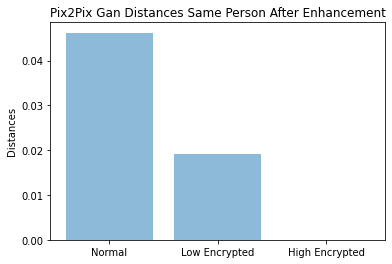

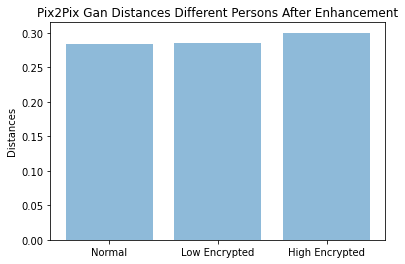

In [ ]:
plt.figure(1)
objects = ('Normal', 'Low Encrypted','High Encrypted')
y_pos = np.arange(len(objects))
performance = [distances_normal/240,distances_lowEncrypted/240,distances_highEncrypted/240]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Distances')
plt.title('Pix2Pix Gan Distances Same Person After Enhancement')
plt.figure(2)
performance_different_persons = [distances_normal_different/240,distances_lowEncrypted_different/240,distances_highEncrypted_different/240]
plt.bar(y_pos, performance_different_persons, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Distances')
plt.title('Pix2Pix Gan Distances Different Persons After Enhancement')
plt.show()

In [ ]:
def FaceRecognizerEnhanced(filename1,filename2):
  folder = './gdrive/MyDrive/CycleGan_FinalTest/'
  # path
  filenameTest = folder + filename1
  filenameVerify= folder + filename2
  if filename2.find("j2k_r") == -1 and filename2.find("j2k") == -1:
    TypeOfTest='normal'
  else:
    if(filename2.find("j2k_r") == -1):
          TypeOfTest='hardEncrypted'
    else:
          TypeOfTest='lowEncrypted'

  detected=DeepFace.verify(img1_path=filenameTest,img2_path=filenameVerify,model_name='Facenet',enforce_detection=False)
  if(filename1.split('_')[0] ==  filename2.split('_')[0]):
    if(detected['verified']):
          return (TypeOfTest,1,detected['distance'],'same')
    else:
          return (TypeOfTest,-1,0,'same')
  else:
    if(detected['verified']):
          return (TypeOfTest,-1,0,'different')
    else:
          return (TypeOfTest,1,detected['distance'],'different')

In [ ]:
# demonstrate face detection on 5 Celebrity Faces Dataset
# specify folder to plot
filename1_normal='501194_490544.jpg'
filename2_normal='501195_490571.jpg'
array_test_images=[filename1_normal,filename2_normal]
folder = './gdrive/MyDrive/CycleGan_FinalTest/'
i = 1
x_axis=0
normal_y_axis=0
lowEncrypted_y_axis=0
distances_normal=0
distances_normal_different=0
distances_lowEncrypted=0
distances_lowEncrypted_different=0
highEncrypted_y_axis=0
distances_highEncrypted=0
distances_highEncrypted_different=0
for testFile in array_test_images:
    # enumerate files
  for filename in listdir(folder):
    # get prediction
    if(filename != '.ipynb_checkpoints'):
      [TypeOfTest,value,distance,sameOrDiff] = FaceRecognizerEnhanced(testFile,filename)
      i+=1
      if(TypeOfTest=='normal'):
        if(sameOrDiff=='same'):
                  normal_y_axis+=value
                  distances_normal+=distance
        else:
                  normal_y_axis+=value
                  distances_normal_different+=distance
      elif(TypeOfTest == 'lowEncrypted'):
        if(sameOrDiff == 'same'):
          lowEncrypted_y_axis+=value
          distances_lowEncrypted+=distance
        else:
          lowEncrypted_y_axis+=value
          distances_lowEncrypted_different+=distance
      else:
        if(sameOrDiff == 'same'):
           highEncrypted_y_axis+=value
           distances_highEncrypted+=distance
        else:
           highEncrypted_y_axis+=value
           distances_highEncrypted_different+=distance

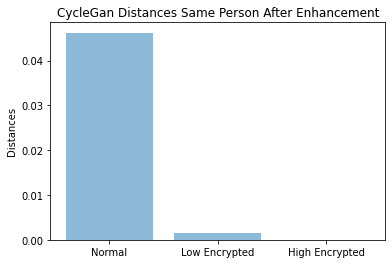

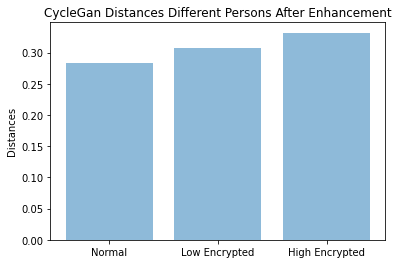

In [ ]:
plt.figure(1)
objects = ('Normal', 'Low Encrypted','High Encrypted')
y_pos = np.arange(len(objects))
performance = [distances_normal/240,distances_lowEncrypted/240,distances_highEncrypted/240]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Distances')
plt.title('CycleGan Distances Same Person After Enhancement')
plt.figure(2)
performance_different_persons = [distances_normal_different/240,distances_lowEncrypted_different/240,distances_highEncrypted_different/240]
plt.bar(y_pos, performance_different_persons, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Distances')
plt.title('CycleGan Distances Different Persons After Enhancement')
plt.show()